# **Preparación de datos previa a proceso de modelado**

## **Librerías**

In [11]:
from modeling_auxiliary_functions import (add_sin_cos_transforms, 
                                          prepare_predictor_dataframe, 
                                          add_total_demand,
                                          pivot_from_column_ref,
                                          apply_pca,
                                          keep_k_best,
                                          train_model
                                 )
import warnings
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [12]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)
warnings.filterwarnings('ignore')

## **Lectura y unificación de información**

### **Lectura**

In [13]:
energy = pd.read_pickle('./clean_datasets/energy_clean_dataset.pkl')
weather = pd.read_pickle('./clean_datasets/weather_clean_dataset.pkl')

### ***Weather***: **Separación de variables por ciudad**

Se requiere utilizar evaluar las variables de las 4 ciudades simultáneamente para cada instante de tiempo. Para ello se realiza un pivot de la información para generar una nueva columna por cada variable y ciudad.

In [14]:
weather = pivot_from_column_ref(weather, index_col="time", new_columns_ref="city_name")
print("Shape:", weather.shape)
weather.head(3)

Shape: (35060, 56)


,time,temp_Barcelona,temp_Bilbao,temp_Madrid,temp_Seville,temp_Valencia,temp_min_Barcelona,temp_min_Bilbao,temp_min_Madrid,temp_min_Seville,temp_min_Valencia,temp_max_Barcelona,temp_max_Bilbao,temp_max_Madrid,temp_max_Seville,temp_max_Valencia,pressure_Barcelona,pressure_Bilbao,pressure_Madrid,pressure_Seville,pressure_Valencia,humidity_Barcelona,humidity_Bilbao,humidity_Madrid,humidity_Seville,humidity_Valencia,wind_speed_Barcelona,wind_speed_Bilbao,wind_speed_Madrid,wind_speed_Seville,wind_speed_Valencia,wind_deg_Barcelona,wind_deg_Bilbao,wind_deg_Madrid,wind_deg_Seville,wind_deg_Valencia,rain_1h_Barcelona,rain_1h_Bilbao,rain_1h_Madrid,rain_1h_Seville,rain_1h_Valencia,rain_3h_Barcelona,rain_3h_Bilbao,rain_3h_Madrid,rain_3h_Seville,rain_3h_Valencia,snow_3h_Barcelona,snow_3h_Bilbao,snow_3h_Madrid,snow_3h_Seville,snow_3h_Valencia,clouds_all_Barcelona,clouds_all_Bilbao,clouds_all_Madrid,clouds_all_Seville,clouds_all_Valencia
0,2015-01-01 00:00:00,281.625,269.657312,267.325000,273.375,270.475,281.625,269.657312,267.325,273.375,270.475,281.625,269.657312,267.325000,273.375,270.475,1035.000000,1070.205106,1070.205106,1070.205106,1001.0,100.0,97.0,63.0,75.0,77.0,7.0,0.0,1.0,1.0,1.0,58.0,226.0,309.0,21.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2015-01-01 01:00:00,281.625,269.763500,267.325000,273.375,270.475,281.625,269.763500,267.325,273.375,270.475,281.625,269.763500,267.325000,273.375,270.475,1035.000000,1035.000000,1070.205106,1070.205106,1001.0,100.0,97.0,63.0,75.0,77.0,7.0,0.0,1.0,1.0,1.0,58.0,229.0,309.0,21.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2015-01-01 02:00:00,281.286,269.251688,289.708181,274.086,269.686,281.286,269.251688,266.186,274.086,269.686,281.286,269.251688,291.172867,274.086,269.686,1070.205106,1070.205106,1070.205106,1070.205106,1002.0,100.0,97.0,64.0,71.0,78.0,7.0,1.0,1.0,3.0,0.0,48.0,224.0,273.0,27.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### **Unificación de fuentes de información**

In [15]:
basic_dataset = pd.merge(weather, energy, how="inner", on="time")
print("Shape:", basic_dataset.shape)
basic_dataset.head(3)

Shape: (35013, 71)


,time,temp_Barcelona,temp_Bilbao,temp_Madrid,temp_Seville,temp_Valencia,temp_min_Barcelona,temp_min_Bilbao,temp_min_Madrid,temp_min_Seville,temp_min_Valencia,temp_max_Barcelona,temp_max_Bilbao,temp_max_Madrid,temp_max_Seville,temp_max_Valencia,pressure_Barcelona,pressure_Bilbao,pressure_Madrid,pressure_Seville,pressure_Valencia,humidity_Barcelona,humidity_Bilbao,humidity_Madrid,humidity_Seville,humidity_Valencia,wind_speed_Barcelona,wind_speed_Bilbao,wind_speed_Madrid,wind_speed_Seville,wind_speed_Valencia,wind_deg_Barcelona,wind_deg_Bilbao,wind_deg_Madrid,wind_deg_Seville,wind_deg_Valencia,rain_1h_Barcelona,rain_1h_Bilbao,rain_1h_Madrid,rain_1h_Seville,rain_1h_Valencia,rain_3h_Barcelona,rain_3h_Bilbao,rain_3h_Madrid,rain_3h_Seville,rain_3h_Valencia,snow_3h_Barcelona,snow_3h_Bilbao,snow_3h_Madrid,snow_3h_Seville,snow_3h_Valencia,clouds_all_Barcelona,clouds_all_Bilbao,clouds_all_Madrid,clouds_all_Seville,clouds_all_Valencia,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,total load actual
0,2015-01-01 00:00:00,281.625,269.657312,267.325000,273.375,270.475,281.625,269.657312,267.325,273.375,270.475,281.625,269.657312,267.325000,273.375,270.475,1035.000000,1070.205106,1070.205106,1070.205106,1001.0,100.0,97.0,63.0,75.0,77.0,7.0,0.0,1.0,1.0,1.0,58.0,226.0,309.0,21.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,447.0,329.0,4844.0,4821.0,298.33756,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,25385.0
1,2015-01-01 01:00:00,281.625,269.763500,267.325000,273.375,270.475,281.625,269.763500,267.325,273.375,270.475,281.625,269.763500,267.325000,273.375,270.475,1035.000000,1035.000000,1070.205106,1070.205106,1001.0,100.0,97.0,63.0,75.0,77.0,7.0,0.0,1.0,1.0,1.0,58.0,229.0,309.0,21.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,449.0,328.0,5196.0,4755.0,298.33756,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0,24382.0
2,2015-01-01 02:00:00,281.286,269.251688,289.708181,274.086,269.686,281.286,269.251688,266.186,274.086,269.686,281.286,269.251688,291.172867,274.086,269.686,1070.205106,1070.205106,1070.205106,1070.205106,1002.0,100.0,97.0,64.0,71.0,78.0,7.0,1.0,1.0,3.0,0.0,48.0,224.0,273.0,27.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,448.0,323.0,4857.0,4581.0,298.33756,1164.0,973.0,1371.0,7099.0,43.0,73.0,50.0,196.0,5461.0,22734.0


Este dataset contiene todas las variables que debidamente han pasado por procesos de limpieza y calidad de la información. Por lo que será utilizado para la siguiente fase de modelación predictiva.

## **Transformaciones**

###
**Revisiones básicas de formato**

In [16]:
basic_dataset = basic_dataset.sort_values(by='time')
basic_dataset.columns = basic_dataset.columns.str.replace(' ', '_')

In [17]:
basic_dataset.dropna()

,time,temp_Barcelona,temp_Bilbao,temp_Madrid,temp_Seville,temp_Valencia,temp_min_Barcelona,temp_min_Bilbao,temp_min_Madrid,temp_min_Seville,temp_min_Valencia,temp_max_Barcelona,temp_max_Bilbao,temp_max_Madrid,temp_max_Seville,temp_max_Valencia,pressure_Barcelona,pressure_Bilbao,pressure_Madrid,pressure_Seville,pressure_Valencia,humidity_Barcelona,humidity_Bilbao,humidity_Madrid,humidity_Seville,humidity_Valencia,wind_speed_Barcelona,wind_speed_Bilbao,wind_speed_Madrid,wind_speed_Seville,wind_speed_Valencia,wind_deg_Barcelona,wind_deg_Bilbao,wind_deg_Madrid,wind_deg_Seville,wind_deg_Valencia,rain_1h_Barcelona,rain_1h_Bilbao,rain_1h_Madrid,rain_1h_Seville,rain_1h_Valencia,rain_3h_Barcelona,rain_3h_Bilbao,rain_3h_Madrid,rain_3h_Seville,rain_3h_Valencia,snow_3h_Barcelona,snow_3h_Bilbao,snow_3h_Madrid,snow_3h_Seville,snow_3h_Valencia,clouds_all_Barcelona,clouds_all_Bilbao,clouds_all_Madrid,clouds_all_Seville,clouds_all_Valencia,generation_biomass,generation_fossil_brown_coal/lignite,generation_fossil_gas,generation_fossil_hard_coal,generation_fossil_oil,generation_hydro_pumped_storage_consumption,generation_hydro_run-of-river_and_poundage,generation_hydro_water_reservoir,generation_nuclear,generation_other,generation_other_renewable,generation_solar,generation_waste,generation_wind_onshore,total_load_actual
0,2015-01-01 00:00:00,281.625,269.657312,267.325000,273.375,270.475,281.625,269.657312,267.325,273.375,270.475,281.625,269.657312,267.325000,273.375,270.475,1035.000000,1070.205106,1070.205106,1070.205106,1001.0,100.0,97.0,63.0,75.0,77.0,7.0,0.0,1.0,1.0,1.0,58.0,226.0,309.0,21.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,447.0,329.0,4844.0,4821.0,298.33756,863.000000,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,25385.0
1,2015-01-01 01:00:00,281.625,269.763500,267.325000,273.375,270.475,281.625,269.763500,267.325,273.375,270.475,281.625,269.763500,267.325000,273.375,270.475,1035.000000,1035.000000,1070.205106,1070.205106,1001.0,100.0,97.0,63.0,75.0,77.0,7.0,0.0,1.0,1.0,1.0,58.0,229.0,309.0,21.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,449.0,328.0,5196.0,4755.0,298.33756,920.000000,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0,24382.0
2,2015-01-01 02:00:00,281.286,269.251688,289.708181,274.086,269.686,281.286,269.251688,266.186,274.086,269.686,281.286,269.251688,291.172867,274.086,269.686,1070.205106,1070.205106,1070.205106,1070.205106,1002.0,100.0,97.0,64.0,71.0,78.0,7.0,1.0,1.0,3.0,0.0,48.0,224.0,273.0,27.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,448.0,323.0,4857.0,4581.0,298.33756,1164.000000,973.0,1371.0,7099.0,43.0,73.0,50.0,196.0,5461.0,22734.0
3,2015-01-01 03:00:00,281.286,269.203344,289.708181,274.086,269.686,281.286,269.203344,266.186,274.086,269.686,281.286,269.203344,291.172867,274.086,269.686,1070.205106,1035.000000,1070.205106,1070.205106,1002.0,100.0,97.0,64.0,71.0,78.0,7.0,1.0,1.0,3.0,0.0,48.0,225.0,273.0,27.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,438.0,254.0,4314.0,4131.0,298.33756,1503.000000,949.0,779.0,7098.0,43.0,75.0,50.0,191.0,5238.0,21286.0
4,2015-01-01 04:00:00,281.286,269.485500,289.708181,274.086,269.686,281.286,269.485500,266.186,274.086,269.686,281.286,269.485500,291.172867,274.086,269.686,1070.205106,1035.000000,1070.205106,1070.205106,1002.0,100.0,97.0,64.0,71.0,78.0,7.0,1.0,1.0,3.0,0.0,48.0,221.0,273.0,27.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,428.0,187.0,4130.0,3840.0,298.33756,475.571302,953.0,720.0,7097.0,43.0,74.0,42.0,189.0,4935.0,20264.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35008,2018-12-31 19:00:00,284.130,281.260000,2

###
**Transformaciones para información disponible para predicciones según escenarios**

In [18]:
# market_offer_dataset = prepare_predictor_dataframe(basic_dataset, dt.datetime(2015,1,2,0), dt.datetime(2018,12,30,0), "market_offer", 4, 4)
# market_offer_dataset = add_sin_cos_transforms(market_offer_dataset, ["month", "dayofweek", "hour"])
# market_offer_dataset.to_pickle('./modeling_datasets/market_offer_dataset.pkl')

In [30]:
first_session_dataset = prepare_predictor_dataframe(basic_dataset, dt.datetime(2015,1,2,0), dt.datetime(2018,12,30,0), "first_session", 4, 4)
first_session_dataset = add_sin_cos_transforms(first_session_dataset, ["month", "dayofweek", "hour"])
first_session_dataset.to_pickle('./modeling_datasets/first_session_dataset.pkl')

100%|██████████| 1459/1459 [20:12<00:00,  1.20it/s]


In [31]:
last_session_dataset = prepare_predictor_dataframe(basic_dataset, dt.datetime(2015,1,2,0), dt.datetime(2018,12,30,0), "last_session", 4, 4)
last_session_dataset = add_sin_cos_transforms(last_session_dataset, ["month", "dayofweek", "hour"])
last_session_dataset.to_pickle('./modeling_datasets/last_session_dataset.pkl')

100%|██████████| 1459/1459 [09:00<00:00,  2.70it/s]


## **Modelado predictivo**

El objetivo es predecir las 24 horas de la demanda total de energía con una anticipación de 12,24 y 36 horas según las sesiones intradiarias del mercado eléctrico mayorista.

In [21]:
def split_train_test_date(data, target_col, sep_date):
    data = data[~data[target_col].isna()]

    train_data = X_train = data[data["time"] < sep_date]
    test_data = data[data["time"] >= sep_date]

    X_train = train_data.drop([target_col, "time"], axis=1)
    y_train = train_data[target_col].values

    X_test = test_data.drop([target_col, "time"], axis=1)
    y_test = test_data[target_col].values

    return X_train, y_train, X_test, y_test, test_data

In [22]:
market_offer_dataset = pd.read_pickle('./modeling_datasets/market_offer_dataset.pkl')
market_offer_dataset = add_total_demand(market_offer_dataset, basic_dataset)
X_train, y_train, X_test, y_test, test_data = split_train_test_date(market_offer_dataset, "total_load_actual", dt.datetime(2018,1,1,0))

In [23]:
min_variance = 0.95
summary, X_reduced, num_components, pca_transformer = apply_pca(X_train, min_variance)
selected_features = keep_k_best(X_train, y_train, num_components)
selected_features

['avg_temp_max_Madrid_4w',
 'avg_generation_fossil_gas_4w',
 'avg_generation_fossil_hard_coal_4w',
 'avg_generation_fossil_oil_4w',
 'avg_generation_hydro_pumped_storage_consumption_4w',
 'avg_generation_hydro_water_reservoir_4w',
 'avg_total_load_actual_4w',
 'sin_hour']

In [24]:
rfo_model = train_model(X_train[selected_features], y_train, "randomForest")

Fitting 3 folds for each of 27 candidates, totalling 81 fits


In [25]:
xgb_model = train_model(X_train[selected_features], y_train, "XGBoost")

Fitting 3 folds for each of 27 candidates, totalling 81 fits


In [26]:
mlp_model = train_model(X_train[selected_features], y_train, "MLP")

Fitting 3 folds for each of 18 candidates, totalling 54 fits


/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/anaconda3/lib/pyth

In [27]:
test_data["xgb_pred"] = xgb_model.predict(X_test[selected_features])
test_data["xgb_pred"] = test_data["xgb_pred"].round(0)

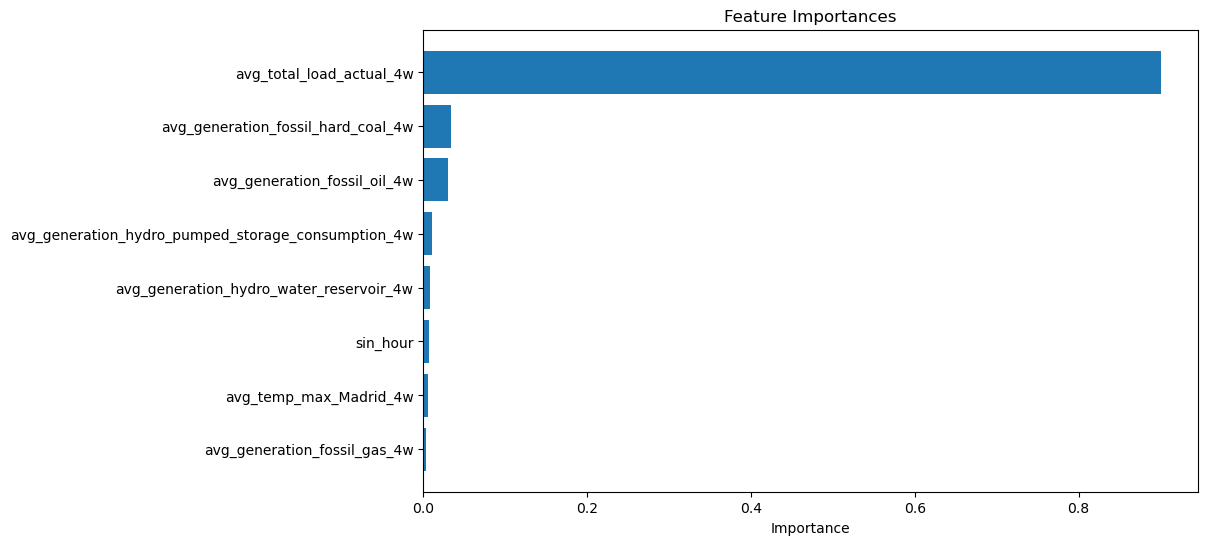

In [29]:
# Get feature importances
importances = rfo_model.feature_importances_

# Create a DataFrame for feature importances
feature_importances_df = pd.DataFrame({
    'Feature': X_train[selected_features].columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()